
 **classification problems** and **logistic regression**. 

 we will be using the [iris dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-dataset).

In [2]:
import torch
from torch import nn
from torch import optim
from torch.nn import functional as F
from sklearn import model_selection
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from IPython import display

import typing
%matplotlib inline

c:\ProgramData\Anaconda3\envs\ML\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


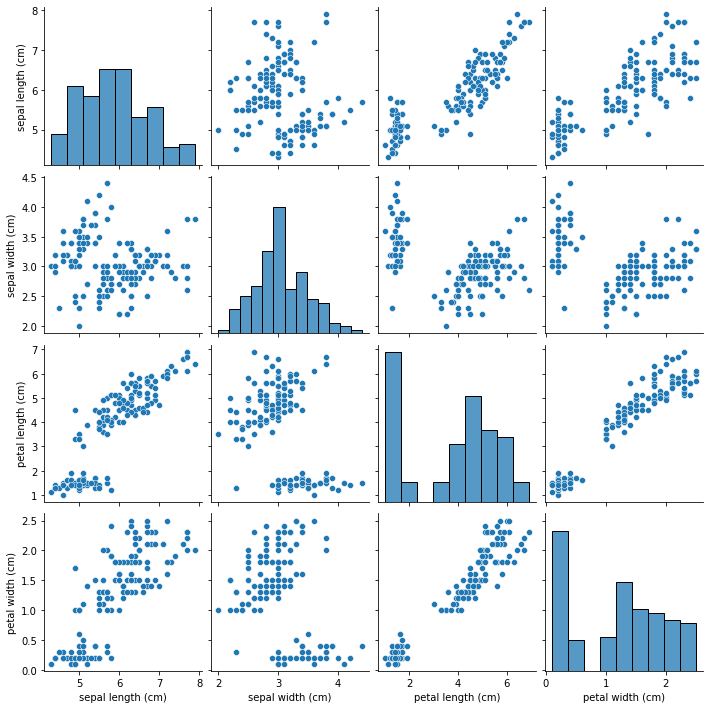

In [3]:
iris_db = datasets.load_iris(as_frame=True)
sn.pairplot(iris_db.data)

In [4]:
iris_db.data.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [5]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    iris_db.data,
    iris_db.target,
    test_size=0.2,
    random_state=42
    )
x_train = torch.from_numpy(X_train.values).float()
x_test = torch.from_numpy(X_test.values).float()

y_train = torch.from_numpy(y_train.values).int()
y_train = y_train.reshape(-1, 1)

y_test = torch.from_numpy(y_test.values).int()
y_test = y_test.reshape(-1, 1)

torch.Size([120, 1])
torch.Size([120, 1])
torch.Size([120, 4])
torch.Size([120, 4])


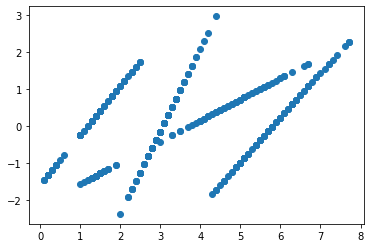

In [6]:
def norm_set(x: torch.Tensor, mu: torch.Tensor, sigma: torch.Tensor) -> torch.tensor:
  X_normalized_set = (x-mu)/sigma
  return X_normalized_set

mu, sigma = torch.mean(x_train, dim=0), torch.std(x_train, dim=0)
x_train_normalized = norm_set(x_train,mu,sigma)
x_test_normalized = norm_set(x_test,mu,sigma)

#Check the dimensions of our set for verification.
print(y_train.shape)
print(x_train[:,0].reshape(-1,1).shape)
print(x_train.shape)
print(x_train_normalized.shape)
fig, axs = plt.subplots(1)
# colors = ["red", "green", "blue", "yellow"]
plt.scatter(x_train,x_train_normalized)

# axs[1].scatter(x_train[:,i], y_train, label = 'Raw data')
# axs[2].hist(x_train_n,bins=1)
#plt.show()

'''for i in range(x_train.shape[1]):
    axs[i].scatter(x_train[:,i], y_train, label = 'Raw data')
    axs[i].scatter(x_train_normalized[:,i], y_train, label = 'Normalized data')
    #axs[i].set_xlabel(features[i])
    axs[i].legend()
'''
plt.show()


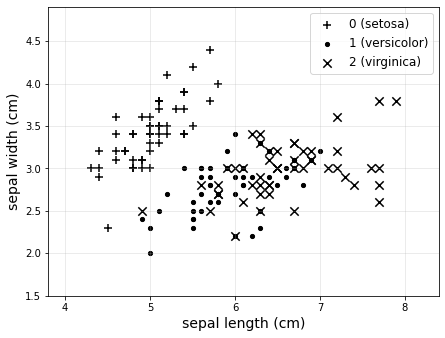

In [7]:
X = iris_db.data.iloc[:, :2] 
Y = iris_db.target
marker_list = ['+', '.', 'x']
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)
ax.set_aspect('equal')

for l in [0, 1, 2]:
  ax.scatter(
      X.loc[Y == l].iloc[:, 0], 
      X.loc[Y == l].iloc[:, 1],
      marker=marker_list[l], 
      s=70, 
      color='black',
      label='{:d} ({:s})'.format(l, iris_db.target_names[l])
      )

ax.legend(fontsize=12)
ax.set_xlabel(iris_db.feature_names[0], fontsize=14)
ax.set_ylabel(iris_db.feature_names[1], fontsize=14)
ax.grid(alpha=0.3)
ax.set_xlim(X.iloc[:, 0].min() - 0.5, X.iloc[:, 0].max() + 0.5)
ax.set_ylim(X.iloc[:, 1].min() - 0.5, X.iloc[:, 1].max() + 0.5)
plt.show()

In [8]:
train_set_1 = x_train_normalized[:, :2]
test_set_1 = x_test_normalized[:, :2]

# add a feature for bias
train_set_1 = torch.cat([train_set_1, torch.ones(train_set_1.shape[0], 1)], dim=1)
test_set_1 = torch.cat([test_set_1, torch.ones(test_set_1.shape[0], 1)], dim=1)

setosa_train = (y_train == 0).int()
setosa_test = (y_test == 0).int()
print(torch.cat([train_set_1, setosa_train],dim = 1))

tensor([[-1.4678,  1.1986,  1.0000,  1.0000],
        [-0.1325,  2.9799,  1.0000,  1.0000],
        [ 1.0814,  0.0854,  1.0000,  0.0000],
        [-1.2250,  0.7533,  1.0000,  1.0000],
        [-1.7106,  0.3080,  1.0000,  1.0000],
        [ 0.5958, -1.2506,  1.0000,  0.0000],
        [ 0.7172,  0.3080,  1.0000,  0.0000],
        [-0.7395,  0.9760,  1.0000,  1.0000],
        [-0.9822,  1.1986,  1.0000,  1.0000],
        [-0.7395,  2.3119,  1.0000,  1.0000],
        [-0.0111, -0.8053,  1.0000,  0.0000],
        [ 0.2316,  0.7533,  1.0000,  0.0000],
        [ 1.0814,  0.0854,  1.0000,  0.0000],
        [-0.4967,  1.8666,  1.0000,  1.0000],
        [-0.4967,  1.4213,  1.0000,  1.0000],
        [-0.3753, -1.4732,  1.0000,  0.0000],
        [ 0.5958, -0.5826,  1.0000,  0.0000],
        [ 0.7172,  0.0854,  1.0000,  0.0000],
        [ 0.9600, -0.1373,  1.0000,  0.0000],
        [ 1.6883,  1.1986,  1.0000,  0.0000],
        [-0.1325, -0.3600,  1.0000,  0.0000],
        [ 2.1739, -0.1373,  1.0000

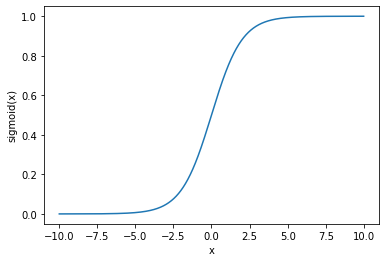

In [9]:
def sigmoid(z: torch.Tensor) -> torch.Tensor:
  z = 1/(1+torch.exp(-z))
  return z


x = torch.arange(1,2000, 1)/100.0 - 10
y = sigmoid(x)
fig, ax1 = plt.subplots()
ax1.plot(x, y)
# set label of horizontal axis
ax1.set_xlabel('x')
# set label of vertical axis
ax1.set_ylabel('sigmoid(x)')
plt.show()

In [10]:
class LogisticRegression(nn.Module):
  def __init__(self, num_features):
    super().__init__()
    self.weight = nn.Parameter(torch.zeros(1, num_features), requires_grad=False)
  
  def forward(self, x):
    y = sigmoid(torch.matmul(x, self.weight.T))
    return y

In [11]:

def bce(y_true: torch.Tensor, y_pred: torch.Tensor) -> torch.Tensor:
  #print(y_pred.shape[0])
  m = y_pred.shape[0] # number of example
  cost = torch.sum(torch.mul(-y_true, torch.log(y_pred)) - torch.mul((1-y_true),torch.log(1-y_pred)))/m
  return cost

def gradient_descent_step(model: nn.Module, X: torch.Tensor, y: torch.Tensor, lr: float) -> None:
  # bias = model.bias
  weight = model.weight
  N = X.shape[0]
  ###
  y_pred = model(X)
  weight -= lr * sum(torch.mul((y_pred-y),X))

  model.weight = nn.Parameter(weight, requires_grad=False)

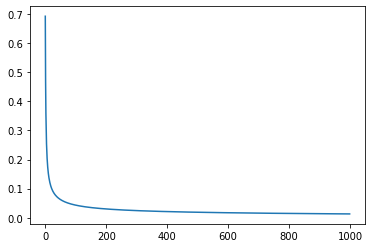

Parameter containing:
tensor([[-8.0550,  4.3156, -4.8374]])
Minimum cost: 0.01293922308832407


In [12]:
def train(model, x, y, alpha):
  cost_lst = list()
  for it in range(1000):
    prediction = model(x)
    cost = bce(y, prediction)
    cost_lst.append(cost)
    gradient_descent_step(model, x, y, alpha)
  # display.clear_output(wait=True)
  plt.plot(list(range(it+1)), cost_lst)
  plt.show()
  print(model.weight)
  print('Minimum cost: {}'.format(min(cost_lst)))

model = LogisticRegression(train_set_1.shape[1])
alpha = 0.01 # select an appropriate lr
train(model, train_set_1, setosa_train, alpha)
f_w = model.weight
f_p = sigmoid(torch.matmul(train_set_1, f_w.T))

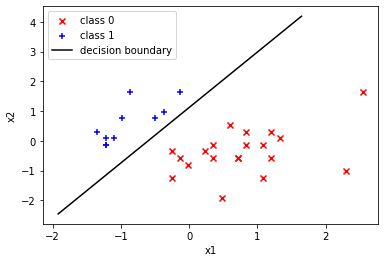

In [13]:
def plot_data_function(X, y, ax1):

    ax1.set_xlabel('x1')
    ax1.set_ylabel('x2')
    
    inds_zero = torch.where(y==0)
    inds_one = torch.where(y==1)

    # scatter the points representing with groundtruth label equal to 0
    ax1.scatter(X[inds_zero[0], 0], X[inds_zero[0], 1], c='red', marker='x', label='class 0')
    # scatter the points representing with groundtruth label equal to 1
    ax1.scatter(X[inds_one[0], 0], X[inds_one[0], 1], c='blue', marker='+', label='class 1')
    
    return ax1

def plot_boundary(X, theta, ax1):
    min_x1 = 0.0
    max_x1 = 0.0
    x2_on_min_x1 = 0.0
    x2_on_max_x1 = 0.0

    min_x1 = torch.amin(X,0)[1]
    max_x1 = torch.amax(X,0)[1]


    x2_on_min_x1 = - (theta[0,0] * min_x1 + theta[0,2]) / theta[0,1]
    x2_on_max_x1 = - (theta[0,0] * max_x1 + theta[0,2]) / theta[0,1]

    x_array = [min_x1, max_x1]
    y_array = [x2_on_min_x1, x2_on_max_x1]
    ax1.plot(x_array, y_array, c='black', label='decision boundary')

    ax1.legend()

fig1, ax1 = plt.subplots()
plot_data_function(x_test_normalized, setosa_test, ax1)
plot_boundary(test_set_1, f_w, ax1)
# 


In [14]:
y_train = F.one_hot(y_train.reshape(-1).long(), num_classes=3)
y_test = F.one_hot(y_test.reshape(-1).long(), num_classes=3)
print(y_test.shape)
print(y_train)

torch.Size([30, 3])
tensor([[1, 0, 0],
        [1, 0, 0],
        [0, 1, 0],
        [1, 0, 0],
        [1, 0, 0],
        [0, 0, 1],
        [0, 1, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [0, 0, 1],
        [0, 1, 0],
        [0, 1, 0],
        [1, 0, 0],
        [1, 0, 0],
        [0, 1, 0],
        [0, 0, 1],
        [0, 0, 1],
        [0, 1, 0],
        [0, 0, 1],
        [0, 1, 0],
        [0, 0, 1],
        [0, 1, 0],
        [1, 0, 0],
        [0, 0, 1],
        [0, 1, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [0, 1, 0],
        [0, 0, 1],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [0, 1, 0],
        [1, 0, 0],
        [0, 1, 0],
        [0, 0, 1],
        [1, 0, 0],
        [0, 1, 0],
        [0, 0, 1],
        [1, 0, 0],
        [0, 0, 1],
        [0, 0, 1],
        [0, 1, 0],
        [0, 1, 0],
        [0, 0, 1],
        [0, 1, 0],
        [1, 0, 0],
        [0, 1, 0],
        [0, 0, 1],
        [1,

In [15]:
alpha = 0.1
setosa_model = nn.Sequential(nn.Linear(x_train_normalized.shape[1], 1, bias=False), nn.Sigmoid())
setosa_labels = y_train[:, 0].reshape(-1, 1).float()
setosa_testy = y_test[:, 0].reshape(-1, 1).float()
optimiser = optim.SGD(setosa_model.parameters(), alpha)

def train(model, x, y, test_x, test_y, optimiser, alpha):
  train_lst = list()
  test_lst = list()
  for i in range(1000):
    model.train()
    optimiser.zero_grad()
    pred = model(x)
    cost = F.binary_cross_entropy(pred, y, reduction='mean')
    cost.backward()
    train_lst.append(cost.item())
    optimiser.step()
    model.eval()
    with torch.no_grad():
      test_pred = model(test_x)
      test_cost = F.binary_cross_entropy(test_pred, test_y, reduction='mean')
      test_lst.append(test_cost)
  fig, axs = plt.subplots(2)
  axs[0].plot(list(range(i+1)), train_lst)
  axs[1].plot(list(range(i+1)), test_lst)
  plt.show()
  print('Minimum train cost: {}'.format(min(train_lst)))
  print('Minimum test cost: {}'.format(min(test_lst)))


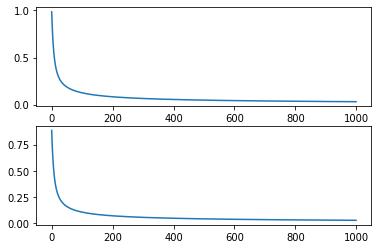

Minimum train cost: 0.03167039901018143
Minimum test cost: 0.02710612304508686
tensor([[3.6226e-02],
        [9.9996e-01],
        [3.5898e-06],
        [3.8045e-02],
        [9.0198e-03],
        [9.9967e-01],
        [2.8141e-01],
        [1.9792e-03],
        [5.1858e-04],
        [8.0519e-02],
        [1.2986e-02],
        [9.9931e-01],
        [9.9992e-01],
        [9.9952e-01],
        [9.9998e-01],
        [1.4931e-01],
        [7.8950e-04],
        [4.2132e-02],
        [5.0957e-02],
        [3.5435e-04],
        [9.9965e-01],
        [1.4282e-02],
        [9.9974e-01],
        [4.8216e-04],
        [1.8506e-02],
        [1.1440e-03],
        [1.1621e-04],
        [1.2378e-03],
        [9.9873e-01],
        [9.9931e-01]], grad_fn=<SigmoidBackward0>)


In [16]:
train(setosa_model, x_train_normalized, setosa_labels, x_test_normalized, setosa_testy, optimiser, alpha)
prediction_class0 = setosa_model(x_test_normalized)
print(prediction_class0)

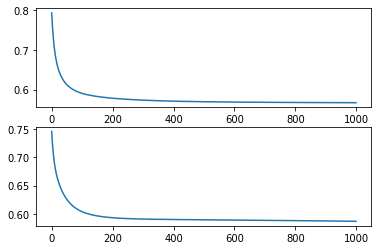

Minimum train cost: 0.5667884945869446
Minimum test cost: 0.586848258972168


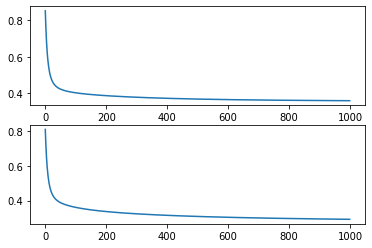

Minimum train cost: 0.36034515500068665
Minimum test cost: 0.2920075058937073


In [25]:
alpha = 0.1
setosa_model = nn.Sequential(nn.Linear(x_train_normalized.shape[1], 1, bias=False), nn.Sigmoid())
setosa_labels = y_train[:, 1].reshape(-1, 1).float()
setosa_testy = y_test[:, 1].reshape(-1, 1).float()
optimiser = optim.SGD(setosa_model.parameters(), alpha)

train(setosa_model, x_train_normalized, setosa_labels, x_test_normalized, setosa_testy, optimiser, alpha)
prediction_class1 = setosa_model(x_test_normalized)

alpha = 0.1
setosa_model = nn.Sequential(nn.Linear(x_train_normalized.shape[1], 1, bias=False), nn.Sigmoid())
setosa_labels = y_train[:, 2].reshape(-1, 1).float()
setosa_testy = y_test[:, 2].reshape(-1, 1).float()
optimiser = optim.SGD(setosa_model.parameters(), alpha)

train(setosa_model, x_train_normalized, setosa_labels, x_test_normalized, setosa_testy, optimiser, alpha)
prediction_class2 = setosa_model(x_test_normalized)

(0.0, 1.0, 0.0, 1.0)

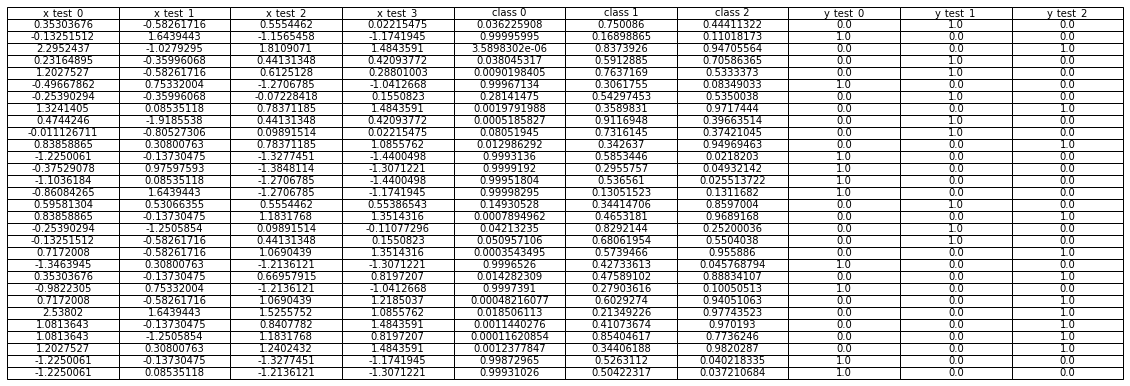

In [26]:
plt.figure(figsize=(20, 6))
total = torch.cat(
    [x_test_normalized, prediction_class0, prediction_class1, prediction_class2, y_test], 
    dim = 1
    ).data.numpy()
#torch.cat(prediction_class0, prediction_class1).data.numpy()
tab = plt.table(
    cellText=total, 
    colLabels=['x_test_0', 'x_test_1', 'x_test_2', 'x_test_3', 'class 0', 'class 1', 'class 2', 'y_test_0', 'y_test_1', 'y_test_2'], 
    loc='center', 
    cellLoc='center', 
    rowLoc='center')
#tab.scale(1,2)
plt.axis('off')


In [27]:
'''
test_pred_0 = setosa_model(x_test)
test_pred_1 = versiclor_model(x_test)
test_pred_2 = virginica_model(x_test)

table_dict = {
    "Setosa":test_pred_0[:,0].detach().numpy(),
    "Versicolor":test_pred_1[:,0].detach().numpy(),
    "Virginica":test_pred_2[:,0].detach().numpy(),
    "Prediction for Setosa":y_test[:,0].detach().numpy(),
    "Prediction for Versicolor":y_test[:,1].detach().numpy(),
    "Prediction for Virginica":y_test[:,2].detach().numpy()
}

pd.DataFrame(data=table_dict)
'''

'\ntest_pred_0 = setosa_model(x_test)\ntest_pred_1 = versiclor_model(x_test)\ntest_pred_2 = virginica_model(x_test)\n\ntable_dict = {\n    "Setosa":test_pred_0[:,0].detach().numpy(),\n    "Versicolor":test_pred_1[:,0].detach().numpy(),\n    "Virginica":test_pred_2[:,0].detach().numpy(),\n    "Prediction for Setosa":y_test[:,0].detach().numpy(),\n    "Prediction for Versicolor":y_test[:,1].detach().numpy(),\n    "Prediction for Virginica":y_test[:,2].detach().numpy()\n}\n\npd.DataFrame(data=table_dict)\n'

In [ ]:
def softmax(z):
    s = torch.exp(z)
    return s / torch.sum(s, dim=1, keepdim=True)


probs = softmax(torch.cat([prediction_class0, prediction_class1, prediction_class2], dim = 1))	
winners = probs.argmax(dim=1)
target = y_test.argmax(dim=1)
corrects = (winners == target)
print(corrects)
accuracy = corrects.sum().float()/float(target.size(0))
print(accuracy)


tensor([ True,  True,  True, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True, False,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True, False,  True,  True,  True])
tensor(0.9000)


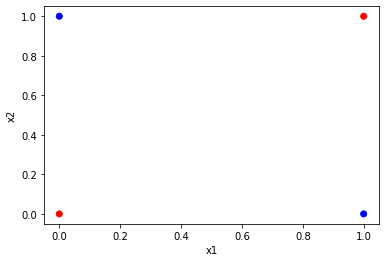

In [ ]:
x1 = [0, 0, 1, 1]
x2 = [0, 1, 0, 1]
y = [0, 1, 1, 0]

c_map = ['r', 'b', 'b', 'r']
plt.scatter(x1, x2, c=c_map)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()